# Imports

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# create figures directory
import os

directory_path = 'figures'
if not os.path.exists(directory_path):
    # If not, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'figures' created successfully.


# Plot aesthetics

In [3]:
# %matplotlib inline
# matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
# matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# # matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# # no bounding boxes or axis:
# matplotlib.rcParams['axes.spines.bottom'] = "off"
# matplotlib.rcParams['axes.spines.top'] = "off"
# matplotlib.rcParams['axes.spines.left'] = "off"
# matplotlib.rcParams['axes.spines.right'] = "off"

matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

%matplotlib inline

In [4]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR
# HERM_COLOR = '#f58020'
# MALE_COLOR = '#1479b8'
# SHARED_SEX_COLOR = '#c2b69b'

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# SHEATH/SOCKET COLORS
# SHEATH_COLOR = '#a5444b'
# SOCKET_COLOR = '#bfbaba'

# DEAFULT teal brown
# SHEATH_COLOR = '#008080'
# SOCKET_COLOR = '#8B4513'

# lighter teal -- EQ
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# teal magenta

# lighter teal brown
# SHEATH_COLOR = '#00CED1'
# SOCKET_COLOR = '#D2691E'

# HEATMAP COLOR AESTHETICS
PLOTLY_COLOR_TEMPLATE = 'plotly_white'
HEATMAP_COLOR = [[0,'rgb(250,250,250)'], [1,'rgb(102,0,204)']]
HEATMAP_MIN_COLOR = 0
HEATMAP_MAX_COLOR = 4

# Load Data

In [5]:
adata = sc.read('../../data/WholeData.h5ad')
adata

AnnData object with n_obs × n_vars = 31410 × 12376
    obs: 'leiden_postBC', 'leiden_preBC', 'sex', 'Compartments_postBC', 'Celltype', 'cluster_sex_label_postBC', 'Compartments_preBC', 'samples', 'sex_specificity_postBC', 'sex_specificity_preBC', 'Cluster_Celltype', 'class_labels', 'cluster_comp_sexes', 'cluster_comp'
    var: 'previous_highly_variable', 'highly_variable', 'gene_ids'
    uns: 'CALICO_signatures', 'CENGEN_signatures', 'Celltype_colors', 'Cluster_Celltype_colors', 'Compartments_colors', 'Compartments_postBC_colors', 'Compartments_preBC_colors', 'DMEigenValues_postBC', 'DMEigenValues_preBC', 'FiguresData_PanGlial_Selection_Results', 'class_labels_colors', 'cluster_sex_label_colors', 'dendrogram_Cluster_Celltype', 'gene_validations', 'leiden_postBC_colors', 'leiden_preBC_colors', 'samples_colors', 'sex_colors', 'sex_frac_postBC', 'sex_frac_preBC', 'sex_specificity_colors', 'sex_specificity_postBC_colors', 'sex_specificity_preBC_colors'
    obsm: 'DM_EigenVectors_postBC', '

# SFig 1X -- CENGEN Signatures

In [6]:
# adata.uns['CENGEN_signatures'].keys()

In [7]:
# get the cluster compartments for the signatures + the calculated signatures for each cells
df_compartments = adata.uns['CENGEN_signatures']['compartment_keys']
df_signatures = adata.uns['CENGEN_signatures']['computed_signatures']

In [8]:
# add the signaters to anndata.obs field to allow for visualization
adata.obs = pd.concat([adata.obs.copy(), df_signatures], axis=1)

In [9]:
# finally group together the signatures -- ordering
ordered_cols = []
compartment_order = ['Glia','Hypodermis','Excretory', 'Muscle_mesoderm','Pharynx',
                     'Reproductive','Intestine','Rectal_cells','Unknown','Unannotated','Neuron']
for comp in compartment_order:
    ordered_cols += df_compartments.loc[df_compartments['signature_comps'] == comp,'signatures'].tolist()

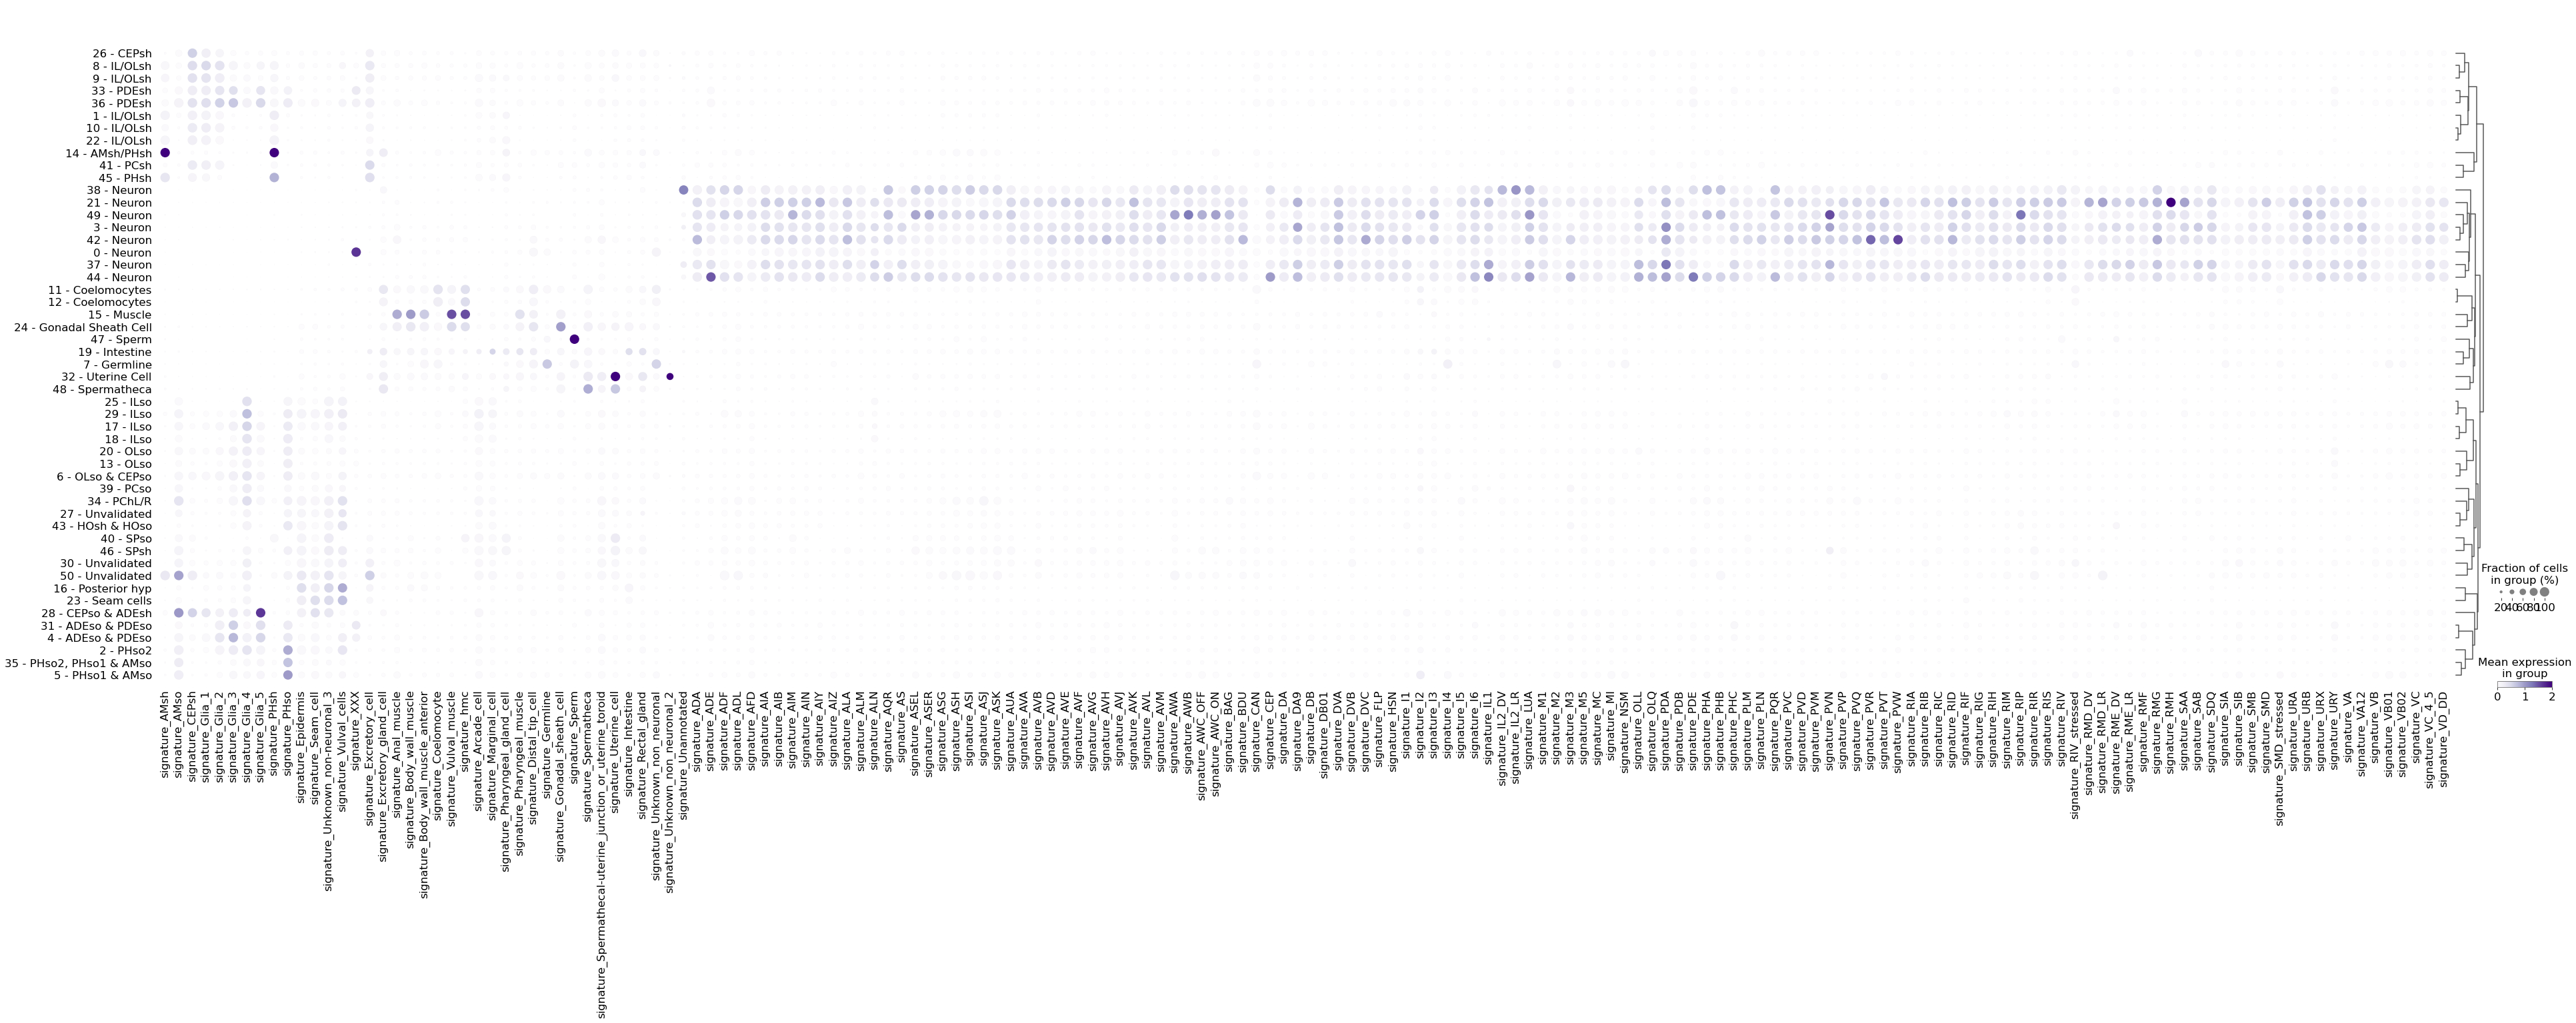

In [10]:
# plot a dotplot of the signatures
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':20.0}):
    ax = sc.pl.dotplot(adata, groupby='Cluster_Celltype', var_names=ordered_cols, dendrogram=True, cmap='Purples', return_fig=True, vmax=2, vmin=0)
    ax.dot_edge_lw = 0.01
    ax.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    plt.savefig('figures/figure_CENGEN_XX_Signatures.png', bbox_inches='tight')
    plt.savefig('figures/figure_CENGEN_XX_Signatures.svg', bbox_inches='tight')  

# SFig 1X -- CALICO Signatures

In [11]:
adata = sc.read('../../data/WholeData.h5ad')
adata

AnnData object with n_obs × n_vars = 31410 × 12376
    obs: 'leiden_postBC', 'leiden_preBC', 'sex', 'Compartments_postBC', 'Celltype', 'cluster_sex_label_postBC', 'Compartments_preBC', 'samples', 'sex_specificity_postBC', 'sex_specificity_preBC', 'Cluster_Celltype', 'class_labels', 'cluster_comp_sexes', 'cluster_comp'
    var: 'previous_highly_variable', 'highly_variable', 'gene_ids'
    uns: 'CALICO_signatures', 'CENGEN_signatures', 'Celltype_colors', 'Cluster_Celltype_colors', 'Compartments_colors', 'Compartments_postBC_colors', 'Compartments_preBC_colors', 'DMEigenValues_postBC', 'DMEigenValues_preBC', 'FiguresData_PanGlial_Selection_Results', 'class_labels_colors', 'cluster_sex_label_colors', 'dendrogram_Cluster_Celltype', 'gene_validations', 'leiden_postBC_colors', 'leiden_preBC_colors', 'samples_colors', 'sex_colors', 'sex_frac_postBC', 'sex_frac_preBC', 'sex_specificity_colors', 'sex_specificity_postBC_colors', 'sex_specificity_preBC_colors'
    obsm: 'DM_EigenVectors_postBC', '

In [12]:
# adata.uns['CALICO_signatures'].keys()

In [13]:
# get the cluster compartments for the signatures + the calculated signatures for each cells
df_compartments = adata.uns['CALICO_signatures']['compartment_keys']
df_signatures = adata.uns['CALICO_signatures']['computed_signatures']

In [14]:
# add the signaters to anndata.obs field to allow for visualization
adata.obs = pd.concat([adata.obs.copy(), df_signatures], axis=1)

In [15]:
# finally group together the signatures -- ordering
ordered_cols = []
for comp in ['Glia','Hypodermis','Excretory','Anatomical','Neuron']:
    ordered_cols += df_compartments.loc[df_compartments['signature_comps'] == comp,'signatures'].tolist()

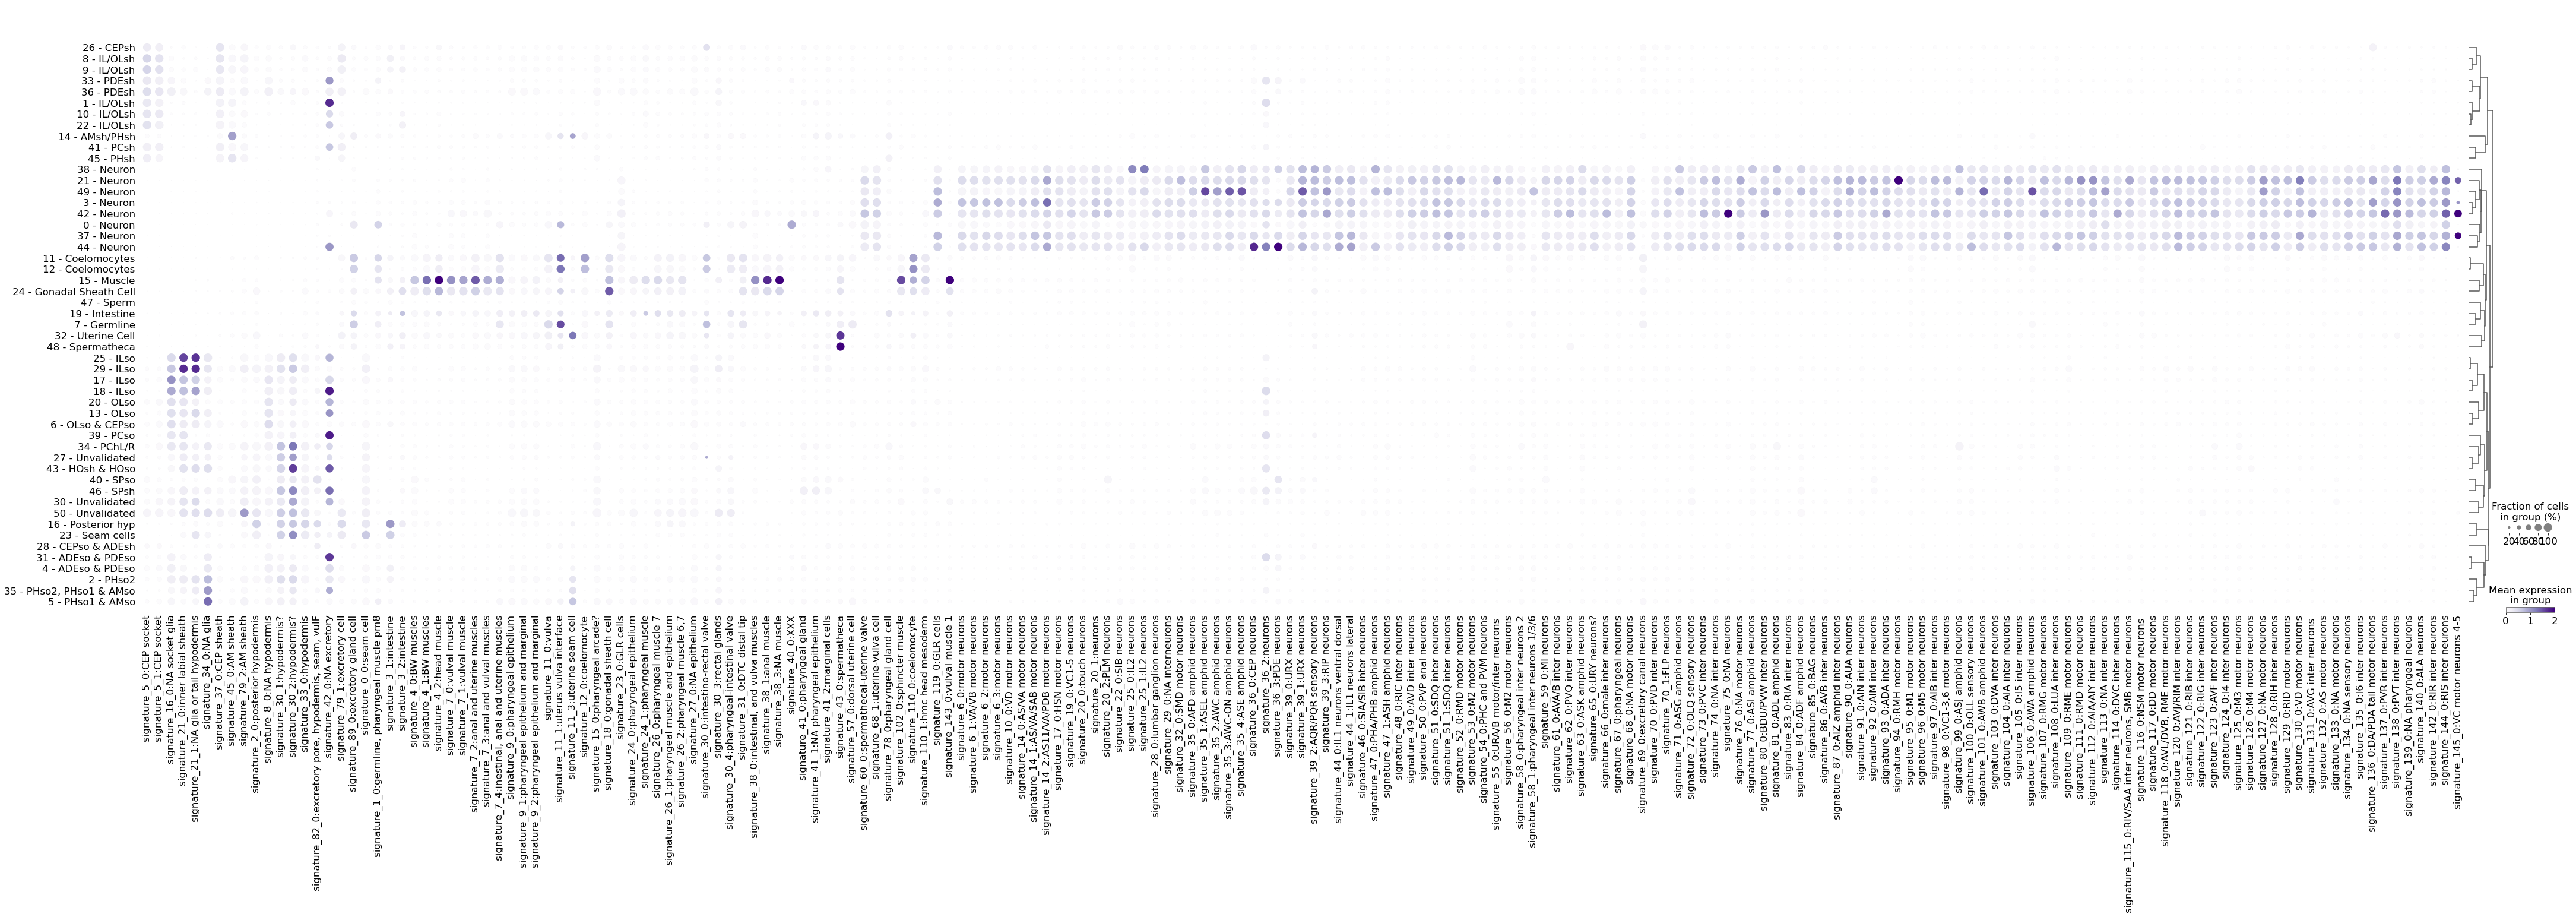

In [16]:
# plot a dotplot of the signatures
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':20.0}):
    ax = sc.pl.dotplot(adata, groupby='Cluster_Celltype', var_names=ordered_cols, dendrogram=True, cmap='Purples', return_fig=True, vmax=2, vmin=0)
    ax.dot_edge_lw = 0.01
    ax.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    plt.savefig('figures/figure_CALICO_XX_Signatures.png', bbox_inches='tight')
    plt.savefig('figures/figure_CALICO_XX_Signatures.svg', bbox_inches='tight')  

# SFig 1X -- Differential Expression Analysis

In [17]:
adata = sc.read('../../data/WholeData.h5ad')
adata

AnnData object with n_obs × n_vars = 31410 × 12376
    obs: 'leiden_postBC', 'leiden_preBC', 'sex', 'Compartments_postBC', 'Celltype', 'cluster_sex_label_postBC', 'Compartments_preBC', 'samples', 'sex_specificity_postBC', 'sex_specificity_preBC', 'Cluster_Celltype', 'class_labels', 'cluster_comp_sexes', 'cluster_comp'
    var: 'previous_highly_variable', 'highly_variable', 'gene_ids'
    uns: 'CALICO_signatures', 'CENGEN_signatures', 'Celltype_colors', 'Cluster_Celltype_colors', 'Compartments_colors', 'Compartments_postBC_colors', 'Compartments_preBC_colors', 'DMEigenValues_postBC', 'DMEigenValues_preBC', 'FiguresData_PanGlial_Selection_Results', 'class_labels_colors', 'cluster_sex_label_colors', 'dendrogram_Cluster_Celltype', 'gene_validations', 'leiden_postBC_colors', 'leiden_preBC_colors', 'samples_colors', 'sex_colors', 'sex_frac_postBC', 'sex_frac_preBC', 'sex_specificity_colors', 'sex_specificity_postBC_colors', 'sex_specificity_preBC_colors'
    obsm: 'DM_EigenVectors_postBC', '

In [18]:
# Differential Expression Analyses -- 51 clusters original data
sc.tl.rank_genes_groups(adata, groupby='Cluster_Celltype', use_raw=False, key_added='Differential_Expression_Analysis')

/home/equitevi/.conda/envs/eq-analysis-update1/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/equitevi/.conda/envs/eq-analysis-update1/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/equitevi/.conda/envs/eq-analysis-update1/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly frag

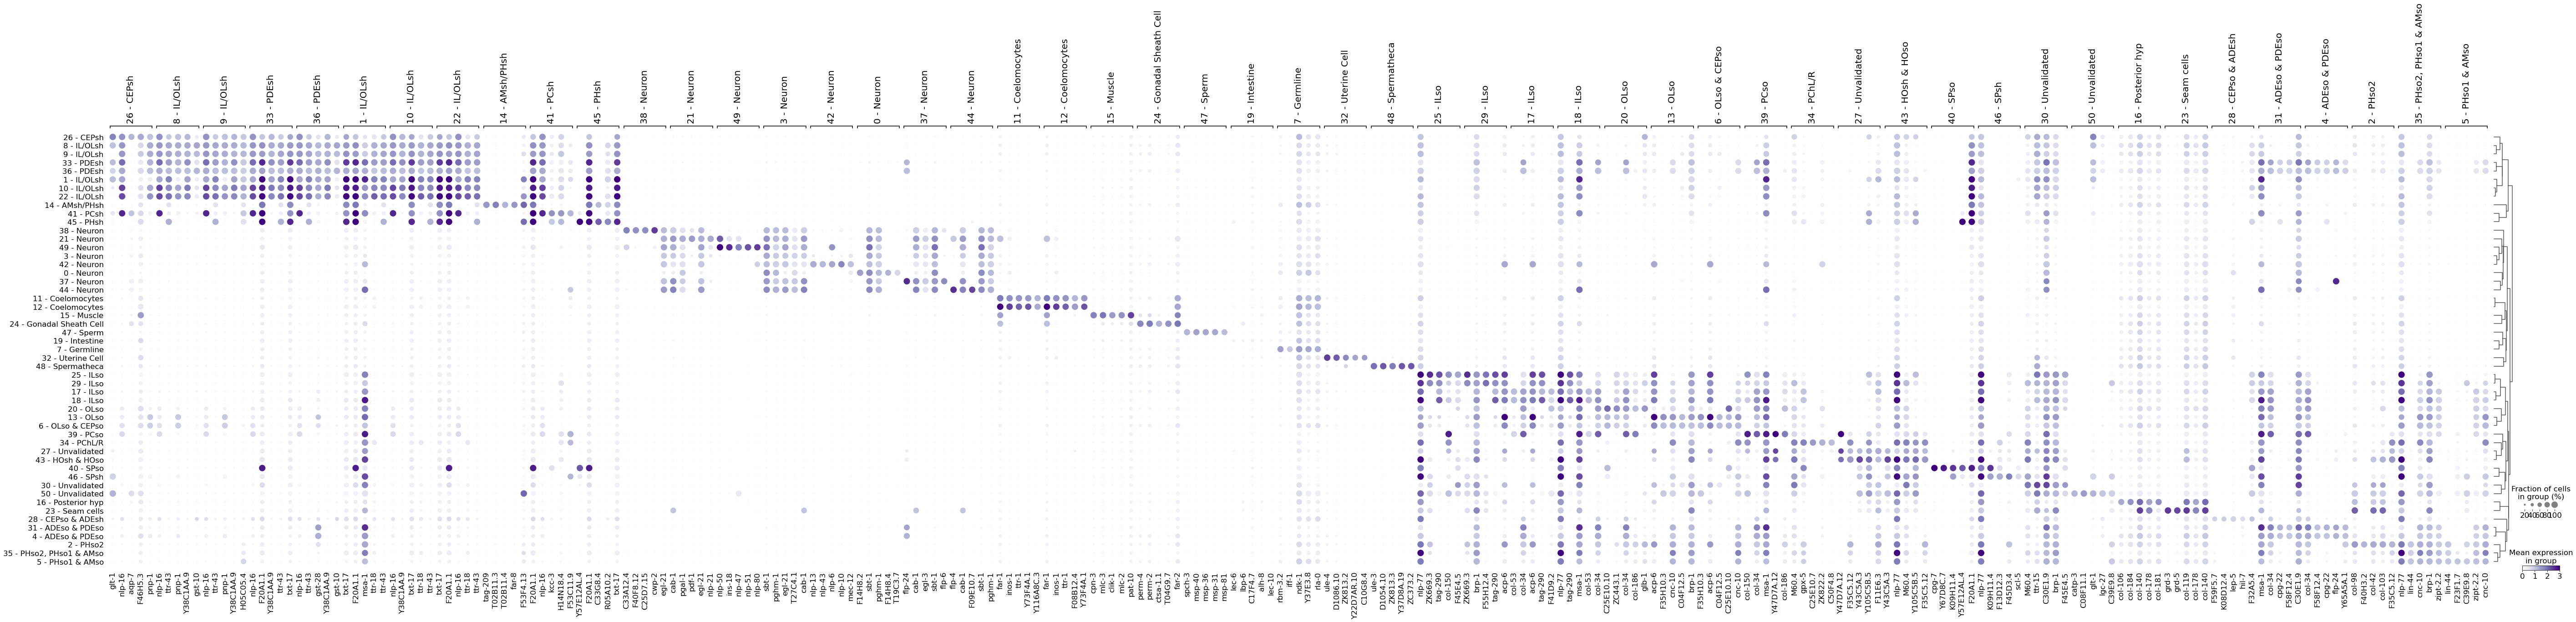

In [19]:
# plot the DE genes
with matplotlib.pyplot.rc_context({'figure.figsize':(20,10),'font.size':20}):
    all_data = sc.pl.rank_genes_groups_dotplot(adata, groupby='Cluster_Celltype', groups=None, dendrogram=True, 
                                               key='Differential_Expression_Analysis', n_genes=5, cmap='Purples', return_fig=True, vmin=0.0, vmax=3, min_logfoldchange=1.5)
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    plt.savefig('figures/figure_DEA_Purice.png', bbox_inches='tight')
    plt.savefig('figures/figure_DEA_Purice.svg', bbox_inches='tight')  